In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_vector(a,b,step):
    new_vec = []
    curr_val = a
    while curr_val < b:
        new_vec.append(curr_val)
        curr_val += step
        
    return new_vec

In [2]:
def fibonacci_sphere(samples=1000):

    points = []
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = 1 - (i / float(samples - 1)) * 2  # y goes from 1 to -1
        radius = math.sqrt(1 - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        points.append((x, y, z))

    return points

In [3]:
def linear_transform(start, end, time):
    
    return time * end + (1 - time) * start

In [4]:
T = create_vector(0,1,0.01)

A simplex $\Delta$ is the set of all points $(\lambda_1, \ldots, \lambda_1)$ such that 

$$\lambda_1 + \ldots + \lambda_n = 1$$

Now, suppose we take $n$ points $\{ b_i \}_{i = 1}^n \subset \mathbb R^3$. These will serve as our extemal points. Then we can define a map:

$$\phi : \Delta_n \rightarrow \mathbb R^3$$
$$(\lambda_1, \ldots,\lambda_n) \rightarrow \lambda_1 b_1 + \ldots + \lambda_n b_n $$

Moreover, it's easy to see that $Im(\phi) \subset Conv(b_1, \ldots, b_n),$ $\phi$ is continuous, and $Im(\phi)$ is compact. Now, suppose we have a probability mass function $\gamma: [0,1] \rightarrow \Delta_n$ that describes the achievable $n$ states of a random variable (i.e. the parameter $p$ binomial distribution of $n$ trials). Then we see that we can visualize such a function as 

$$\phi \circ \gamma : [0,1] \rightarrow \mathbb R^3$$

A good choice for $b_i$ are the maximal volume spherical codes, as listed on http://neilsloane.com/maxvolumes/

## $2_2$ Hardy Weinburg

In [5]:
basis = fibonacci_sphere(3)
basis = np.array(basis)

bounds = []

for i in range(len(basis)): 
    for j in range(len(basis)):
        if i < j:
            bounds.append(np.array(list(map(lambda t : linear_transform(basis[i], basis[j], t),T))))

In [6]:
def hardy_weinburg(z):
    
    return np.array([z ** 2, 2 * z * (1 - z), (1 - z) ** 2])

In [7]:
W = np.array(list(map(hardy_weinburg,T)))

In [8]:
transformed = []
for new_point in W:
    transformed_point = np.zeros(3)
    for coord, basis_vec in zip(new_point, basis):        
        transformed_point += coord * basis_vec
    transformed.append(transformed_point)
    
transformed = np.array(transformed)

<IPython.core.display.Javascript object>


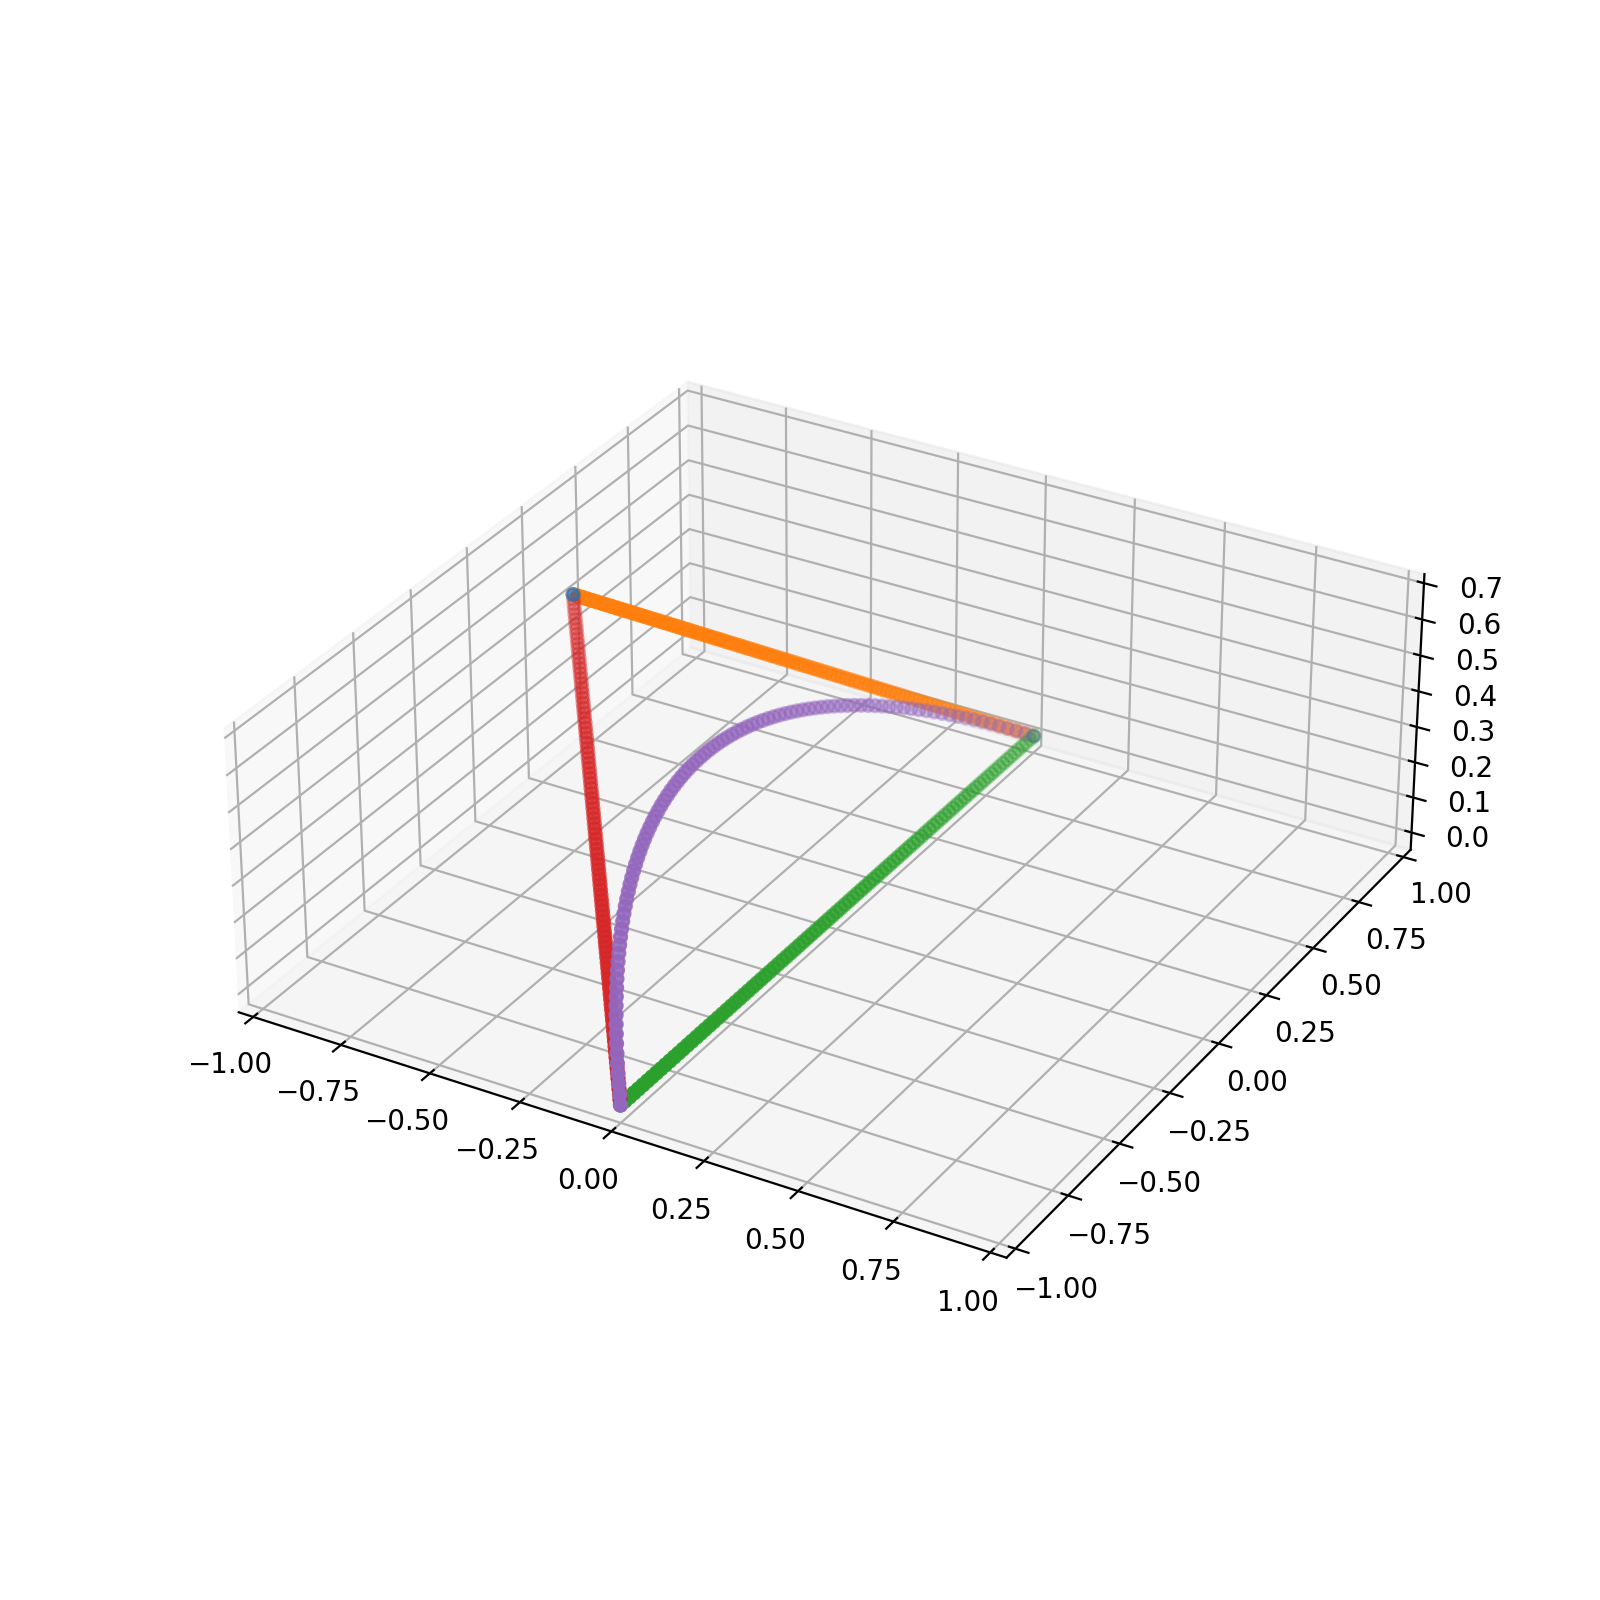

In [9]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(basis[:,0], basis[:,1], basis[:,2])
for i in range(len(bounds)):
    ax.scatter3D(bounds[i][:,0], bounds[i][:,1], bounds[i][:,2])
ax.scatter3D(transformed[:,0], transformed[:,1], transformed[:,2])
ax.axes.set_xlim3d(left=-1, right=1) 
ax.axes.set_ylim3d(bottom=-1, top=1)  
ax.axes.set_ylim3d(bottom=-1, top=1) 
ax.set_aspect('equal', adjustable='box')
plt.show()

## $2_3$ Twisted Cubic

In [10]:
def twisted_cubic(z):
    
    return np.array([z ** 3, 3 * z ** 2 * (1 - z), 3 * z * (1 - z) ** 2, (1 - z) ** 3 ])

In [11]:
W = np.array(list(map(twisted_cubic,T)))

In [12]:
basis = []

basis.append([-0.405661902390, 0.811159378849, 0.421258687973])
basis.append([0.982122508809, 0.143498413265, -0.121834238060])
basis.append([-0.426168178208, -0.161832264625, -0.890051122755])
basis.append([-0.150292427279, -0.792825528421, 0.590626672842])

In [13]:
# basis = fibonacci_sphere(4)
basis = np.array(basis)

bounds = []

for i in range(len(basis)): 
    for j in range(len(basis)):
        if i < j:
            bounds.append(np.array(list(map(lambda t : linear_transform(basis[i], basis[j], t),T))))

In [14]:
transformed = []
for new_point in W:
    transformed_point = np.zeros(3)
    for coord, basis_vec in zip(new_point, basis):        
        transformed_point += coord * basis_vec
    transformed.append(transformed_point)
    
transformed = np.array(transformed)

<IPython.core.display.Javascript object>


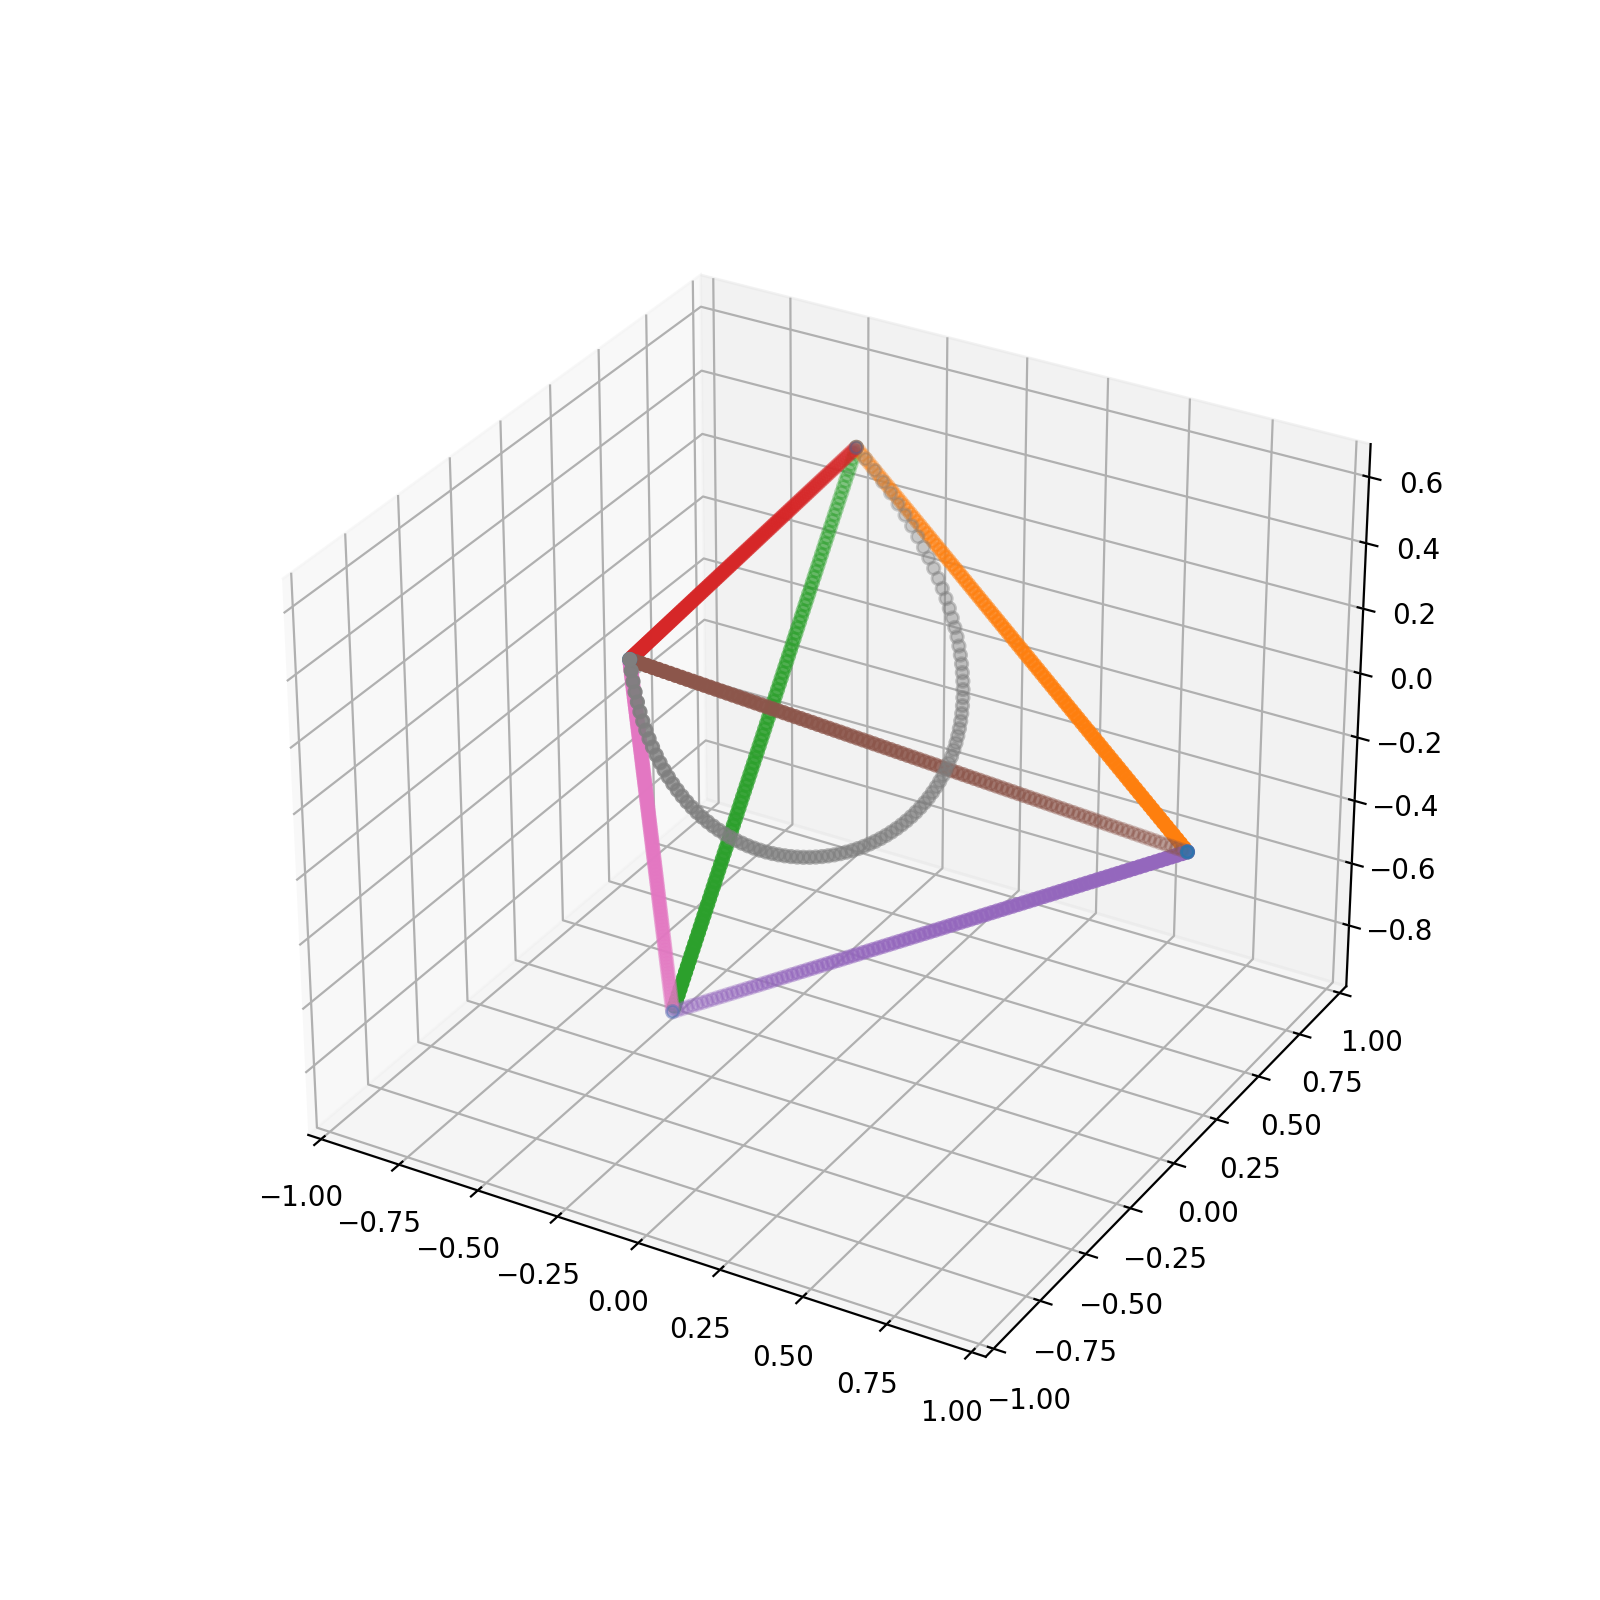

In [15]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(basis[:,0], basis[:,1], basis[:,2])
for i in range(len(bounds)):
    ax.scatter3D(bounds[i][:,0], bounds[i][:,1], bounds[i][:,2])
ax.scatter3D(transformed[:,0], transformed[:,1], transformed[:,2])
ax.axes.set_xlim3d(left=-1, right=1) 
ax.axes.set_ylim3d(bottom=-1, top=1)  
ax.axes.set_ylim3d(bottom=-1, top=1) 
ax.set_aspect('equal', adjustable='box')
plt.show()

## $(2,2)$ Two-bit Independence Model

In [16]:
P = create_vector(0,1,0.03)
Q = create_vector(0,1,0.03)

P_, Q_ = np.meshgrid(P, Q)

W = []
for i in range(len(P)):
    p = P[i]
    for j in range(len(Q)):
        q = Q[j]
        W.append([p*q, p*(1 - q), (1 - p)*q, (1 - p)*(1-q)])
        
W = np.array(W)

In [17]:
basis = []

basis.append([-0.405661902390, 0.811159378849, 0.421258687973])
basis.append([0.982122508809, 0.143498413265, -0.121834238060])
basis.append([-0.426168178208, -0.161832264625, -0.890051122755])
basis.append([-0.150292427279, -0.792825528421, 0.590626672842])

basis = np.array(basis)

bounds = []

for i in range(len(basis)): 
    for j in range(len(basis)):
        if i < j:
            bounds.append(np.array(list(map(lambda t : linear_transform(basis[i], basis[j], t),T))))

In [18]:
transformed = []
for new_point in W:
    transformed_point = np.zeros(3)
    for coord, basis_vec in zip(new_point, basis):        
        transformed_point += coord * basis_vec
    transformed.append(transformed_point)
    
transformed = np.array(transformed)

<IPython.core.display.Javascript object>


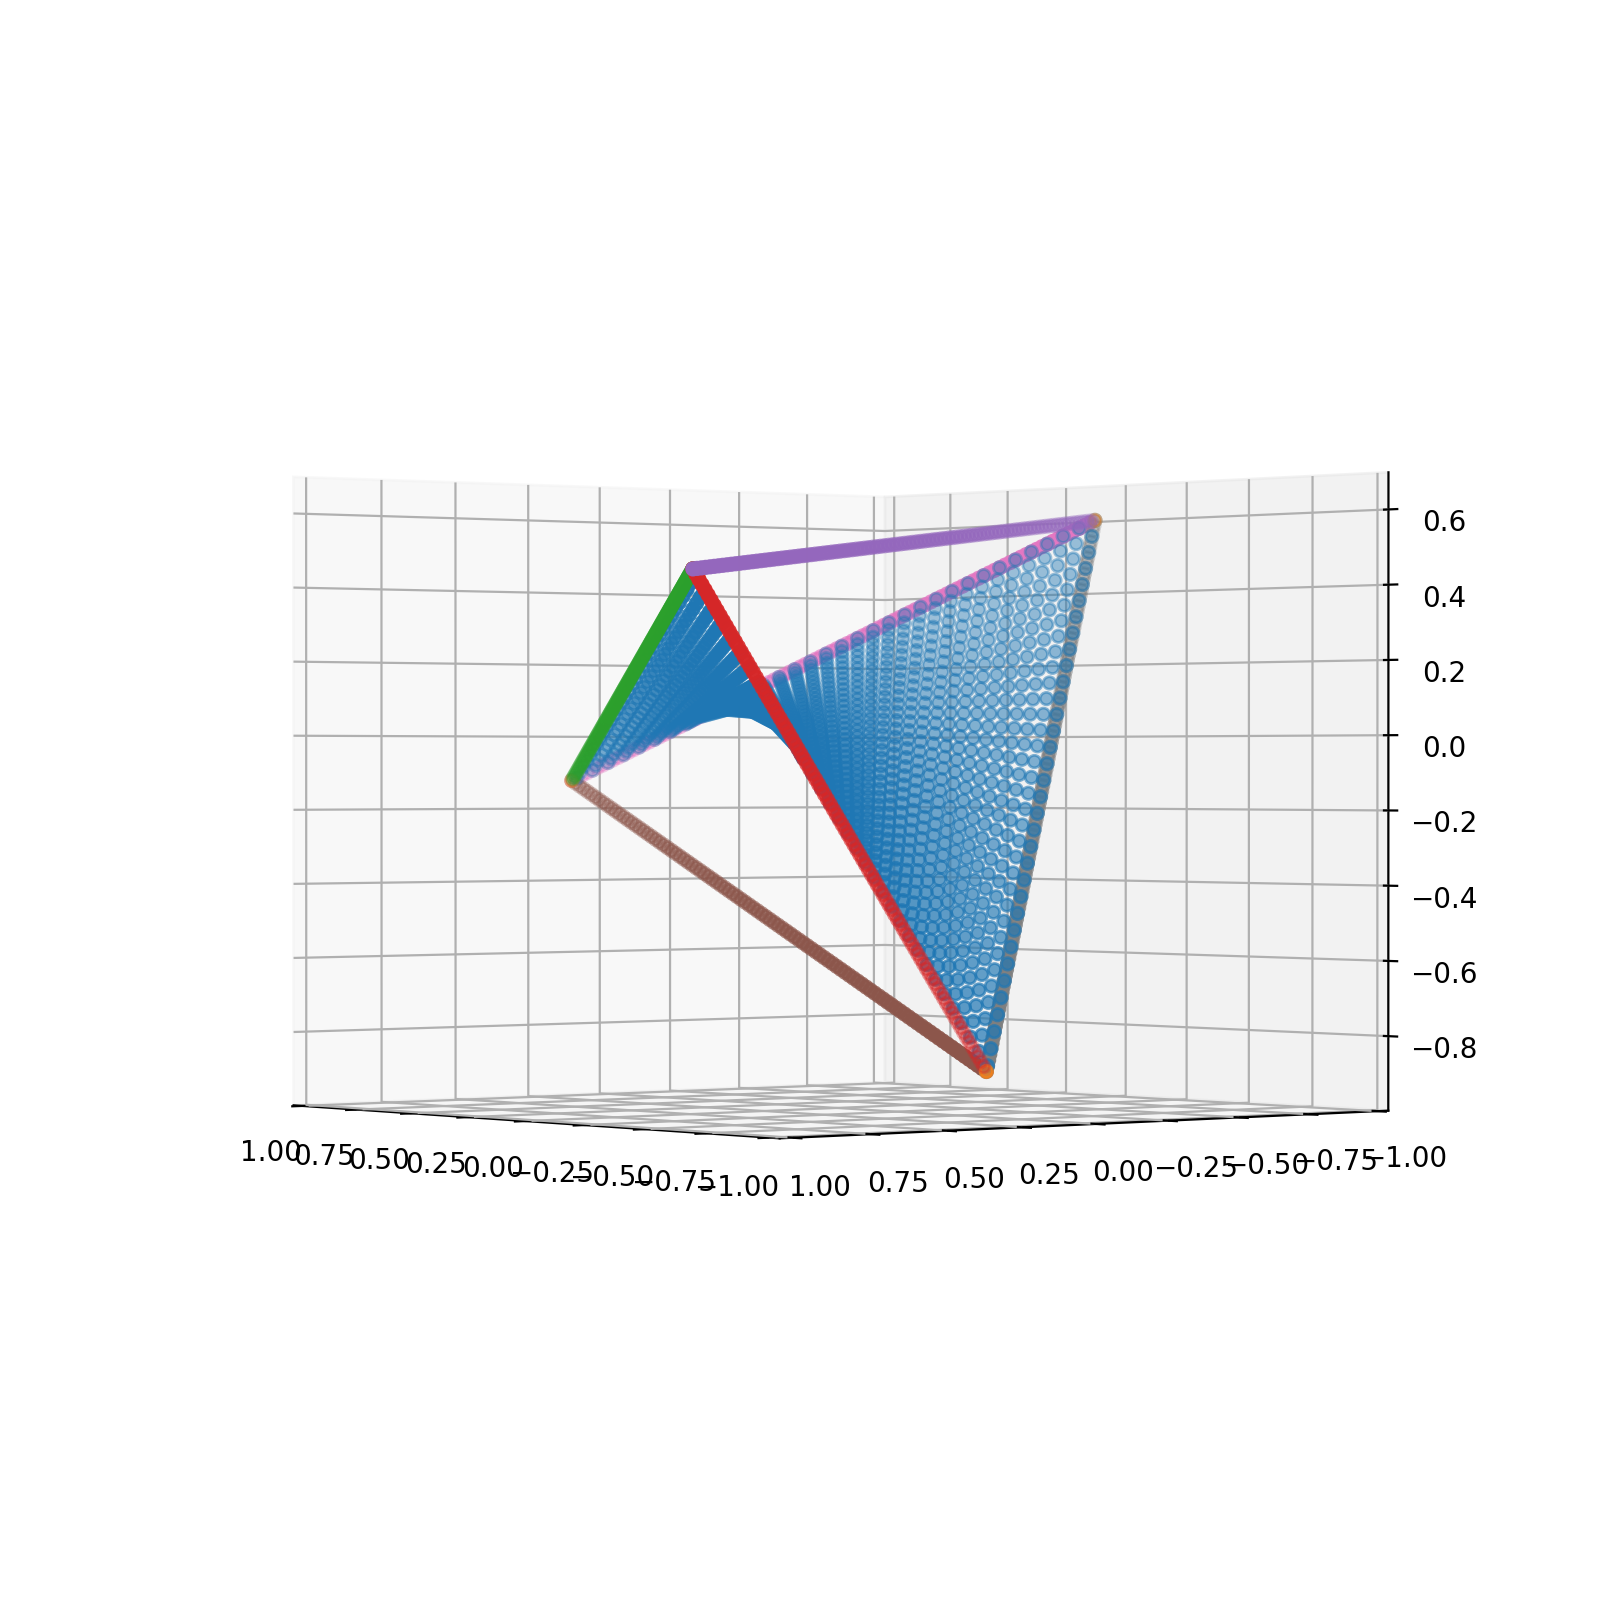

In [19]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(transformed[:,0], transformed[:,1], transformed[:,2])
ax.scatter3D(basis[:,0], basis[:,1], basis[:,2])
for i in range(len(bounds)):
    ax.scatter3D(bounds[i][:,0], bounds[i][:,1], bounds[i][:,2])
ax.axes.set_xlim3d(left=-1, right=1) 
ax.axes.set_ylim3d(bottom=-1, top=1)  
ax.axes.set_ylim3d(bottom=-1, top=1) 
ax.set_aspect('equal', adjustable='box')
plt.show()

## $2_5$ Twisted Quartic

In [29]:
def twisted_quartic(z):
    
    return np.array([z ** 4, 4 * z ** 3 * (1 - z), 6 * z ** 2 * (1 - z) ** 2, 4 * z * (1 - z) ** 3, (1 - z) ** 4 ])
    
W = np.array(list(map(twisted_quartic,T)))

basis = []

basis.append([-0.854342356324,-0.213386876509,0.473883084022])
basis.append([-0.035636577755,0.933728066273,0.356204900891])
basis.append([0.466841537505,-0.715788627043,0.519331895746])
basis.append([0.854342356324,0.213386876509,-0.473883084022])
basis.append([-0.431204959750, -0.217939438298,-0.875536796637])

# basis = fibonacci_sphere(4)
basis = np.array(basis)

bounds = []

for i in range(len(basis)): 
    for j in range(len(basis)):
        if i < j:
            bounds.append(np.array(list(map(lambda t : linear_transform(basis[i], basis[j], t),T))))
            
transformed = []
for new_point in W:
    transformed_point = np.zeros(3)
    for coord, basis_vec in zip(new_point, basis):        
        transformed_point += coord * basis_vec
    transformed.append(transformed_point)
    
transformed = np.array(transformed)

<IPython.core.display.Javascript object>


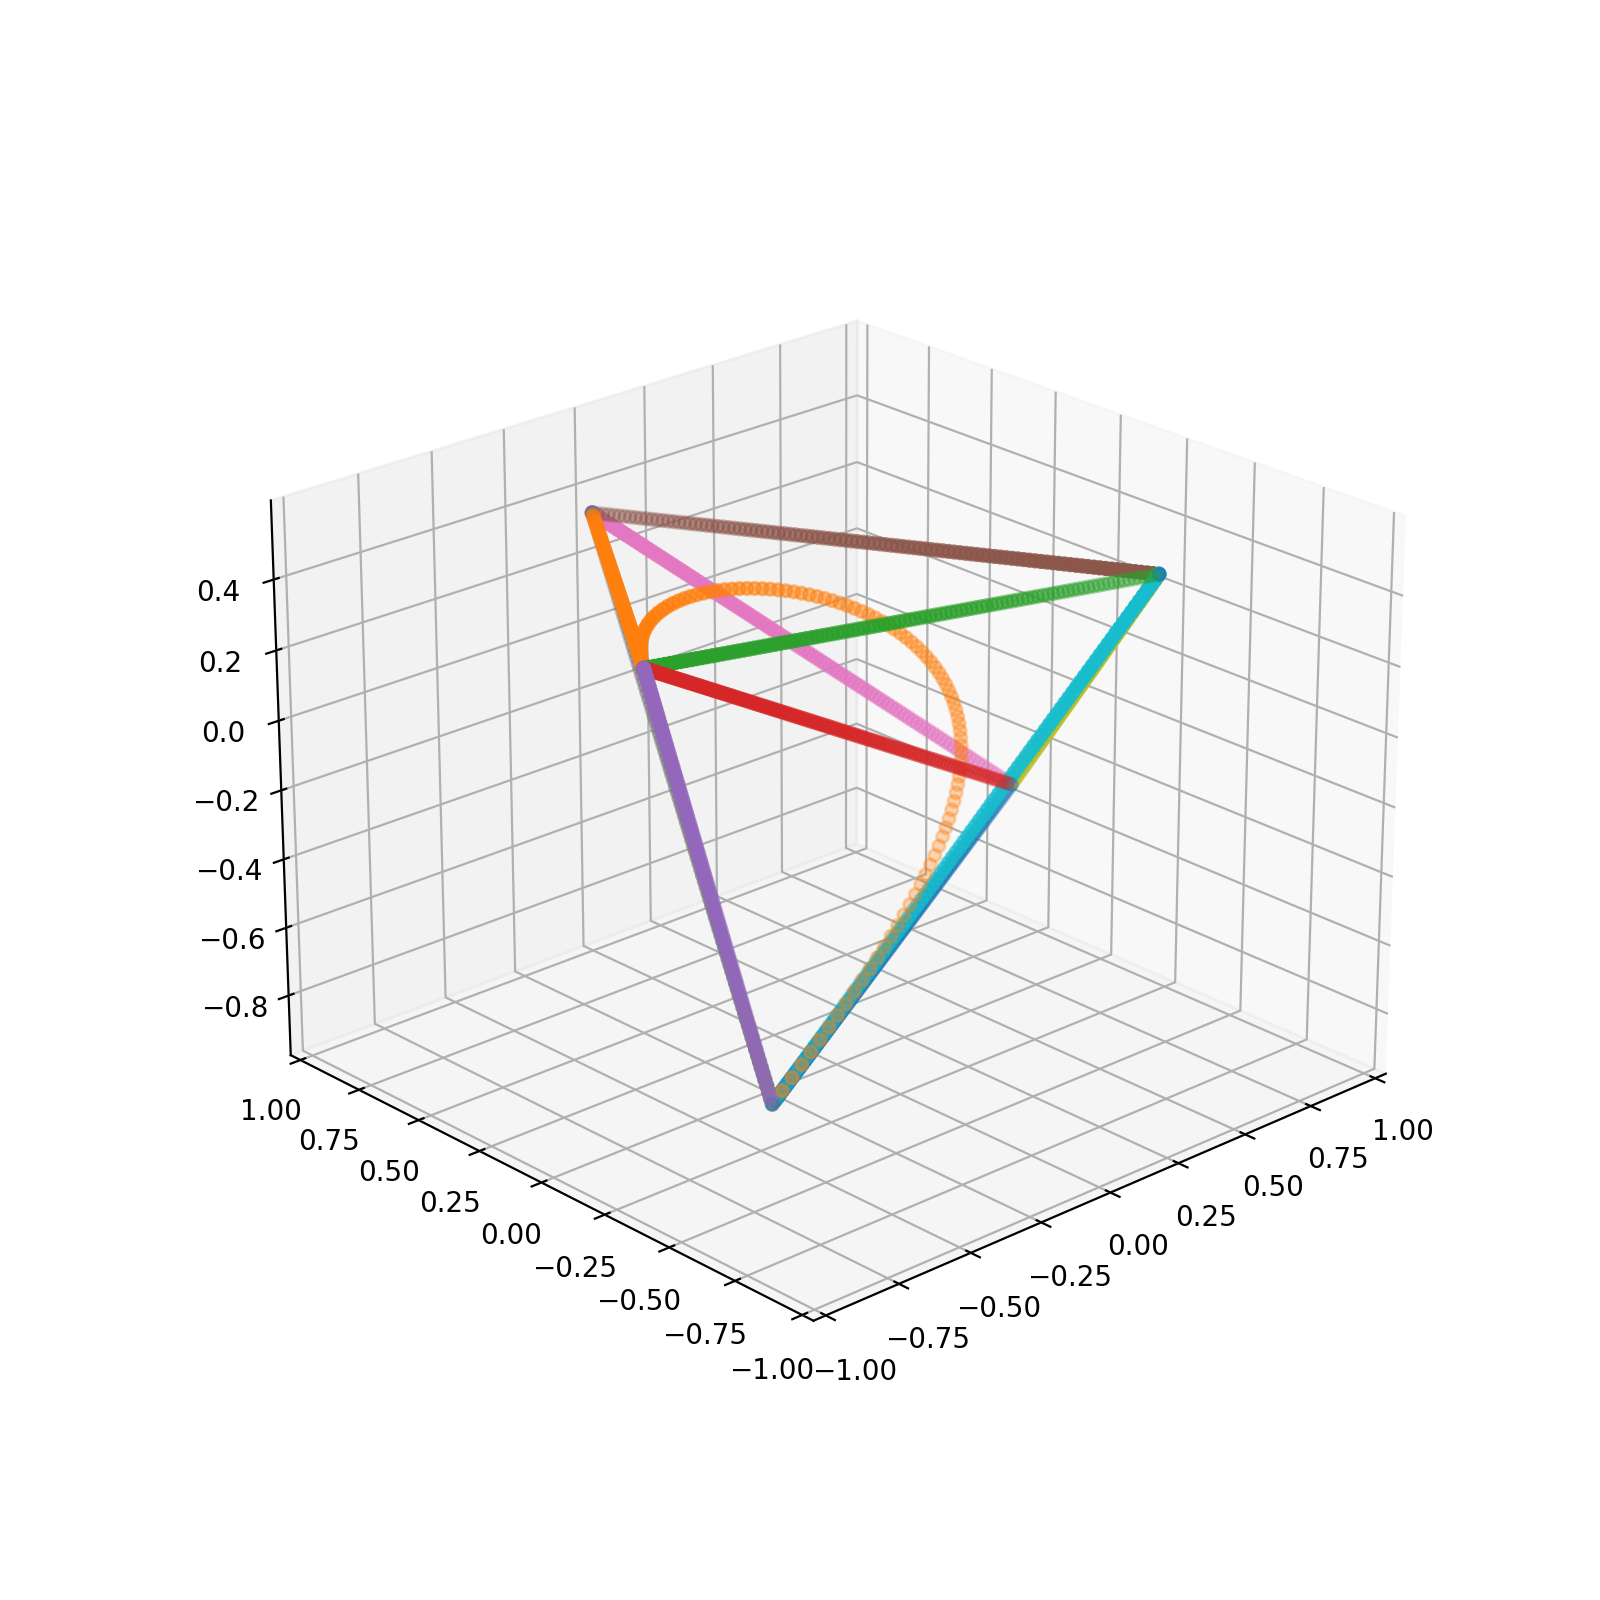

In [30]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(basis[:,0], basis[:,1], basis[:,2])
for i in range(len(bounds)):
    ax.scatter3D(bounds[i][:,0], bounds[i][:,1], bounds[i][:,2])
ax.scatter3D(transformed[:,0], transformed[:,1], transformed[:,2])
ax.axes.set_xlim3d(left=-1, right=1) 
ax.axes.set_ylim3d(bottom=-1, top=1)  
ax.axes.set_ylim3d(bottom=-1, top=1) 
ax.set_aspect('equal', adjustable='box')
plt.show()

## $(2_2,2)$ Example

In [31]:
P = create_vector(0,1,0.03)
Q = create_vector(0,1,0.03)

P_, Q_ = np.meshgrid(P, Q)

W = []
for i in range(len(P)):
    p = P[i]
    for j in range(len(Q)):
        q = Q[j]
        W.append([p ** 2 * q, 2 * p * (1 - p) * q, (1-p) **2 * q, p ** 2 * (1 - q), 2*p*(1-p)*(1-q), (1 - p)**2 * (1 - q)])
        
W = np.array(W)

basis = []

basis.append([0.149835158139, 0.876024759375, 0.458399438299]) 
basis.append([-0.703942442313, -0.231042208150, 0.671628270298])
basis.append([-0.149835158139, -0.876024759375, -0.458399438299])
basis.append([-0.694272613153, 0.423320349306, -0.582052763551])
basis.append([0.703942443244, 0.231042208150, -0.671628270298])
basis.append([0.694272613153, -0.423320349306, 0.582052763551])

# basis = fibonacci_sphere(4)
basis = np.array(basis)

bounds = []

for i in range(len(basis)): 
    for j in range(len(basis)):
        if i < j:
            bounds.append(np.array(list(map(lambda t : linear_transform(basis[i], basis[j], t),T))))
            
transformed = []
for new_point in W:
    transformed_point = np.zeros(3)
    for coord, basis_vec in zip(new_point, basis):        
        transformed_point += coord * basis_vec
    transformed.append(transformed_point)
    
transformed = np.array(transformed)

<IPython.core.display.Javascript object>


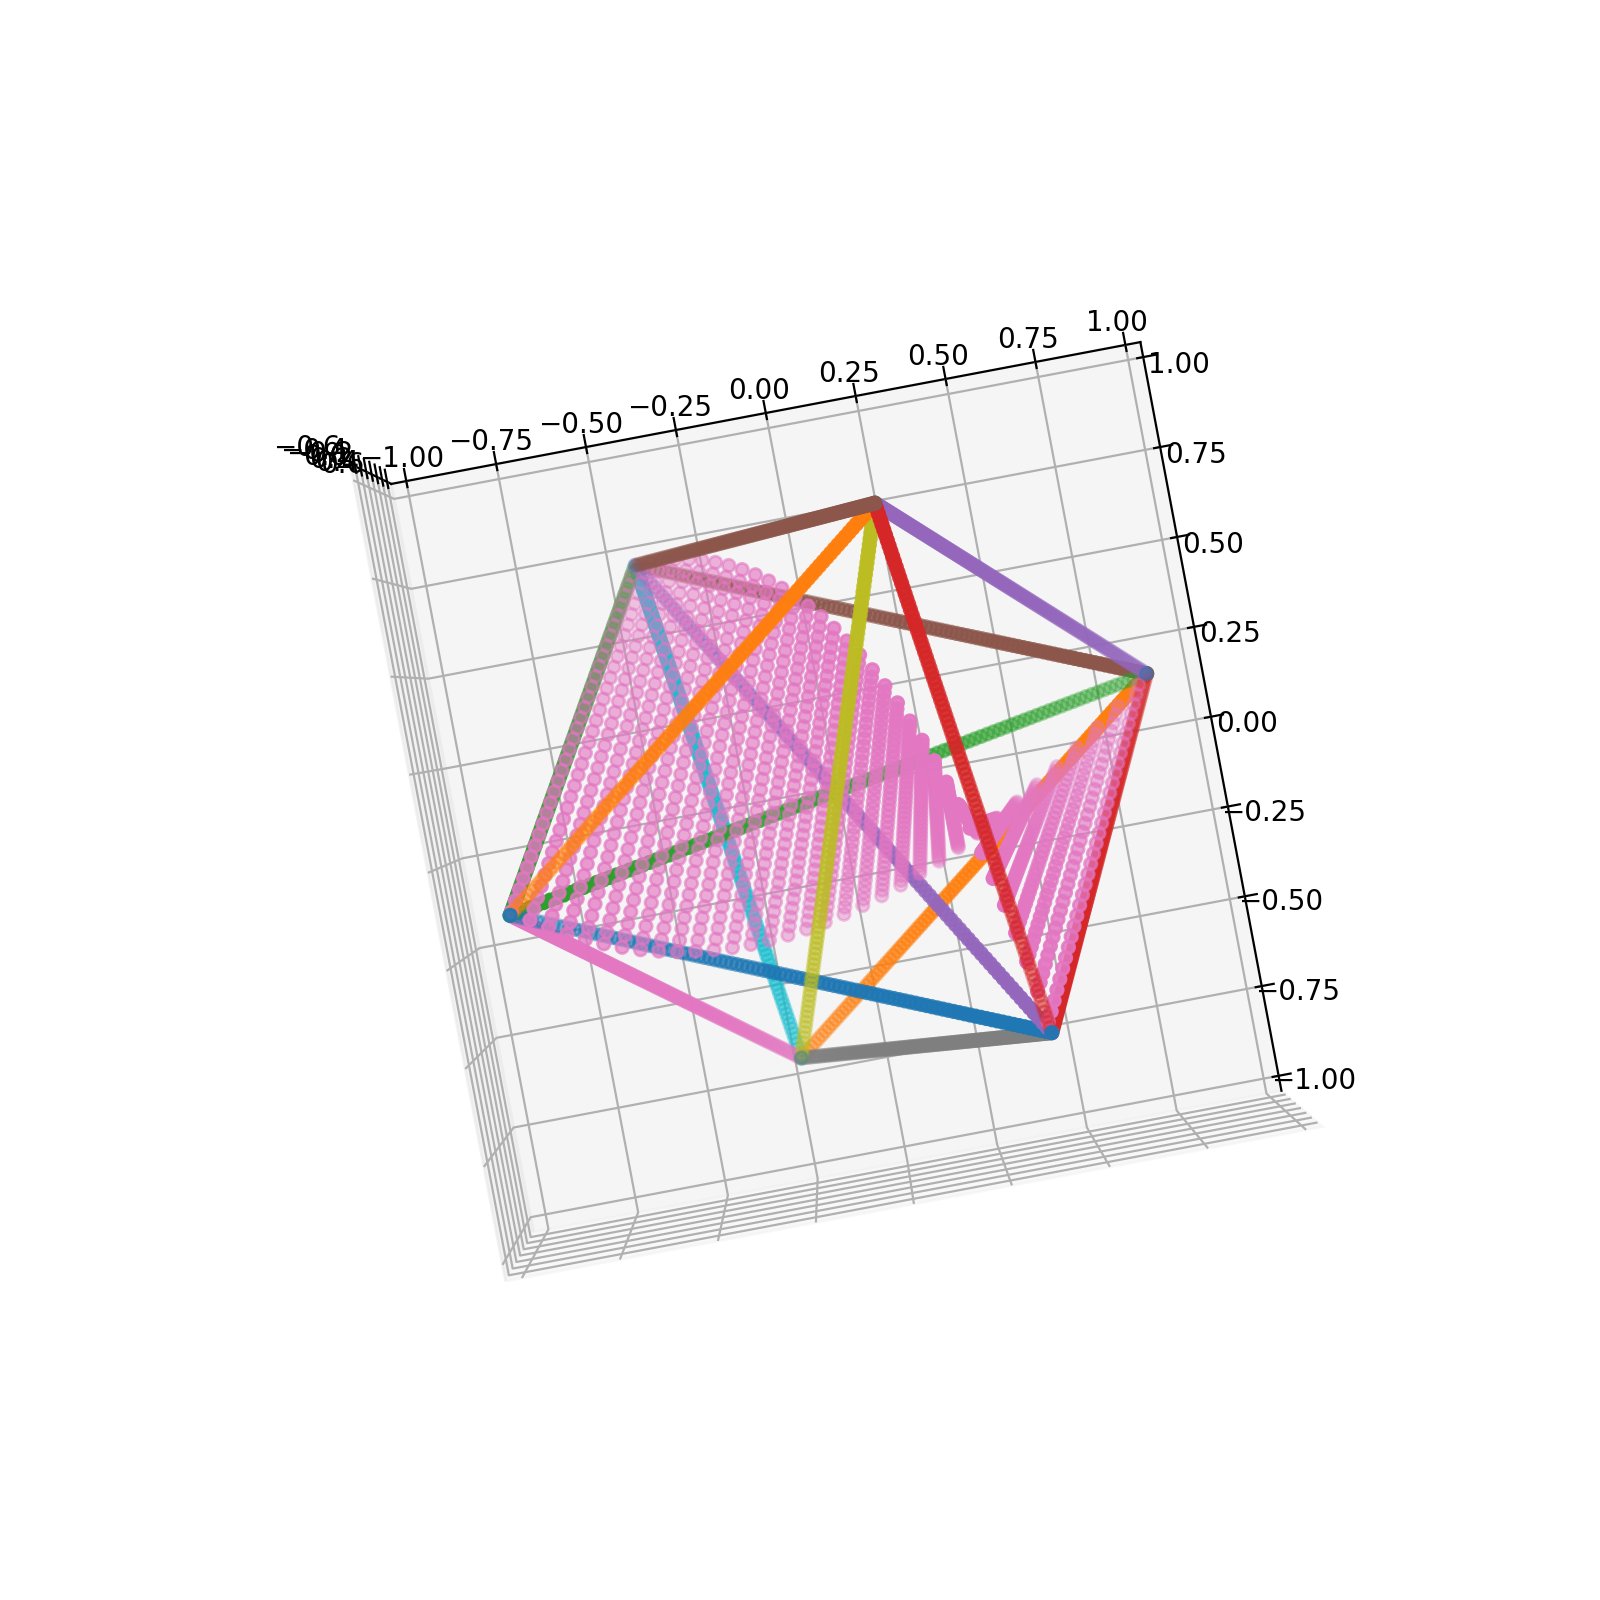

In [32]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(basis[:,0], basis[:,1], basis[:,2])
for i in range(len(bounds)):
    ax.scatter3D(bounds[i][:,0], bounds[i][:,1], bounds[i][:,2])
ax.scatter3D(transformed[:,0], transformed[:,1], transformed[:,2])
ax.axes.set_xlim3d(left=-1, right=1) 
ax.axes.set_ylim3d(bottom=-1, top=1)  
ax.axes.set_ylim3d(bottom=-1, top=1) 
ax.set_aspect('equal', adjustable='box')
plt.show()

## $2_6$ Twisted Quintic

In [22]:
def twisted_quintic(z):
    
    return np.array([z ** 5, 5 * z ** 4 * (1 - z), 10 * z ** 3 * (1 - z) ** 2, 10 * z ** 2 * (1 - z) ** 3, 5 * z * (1 - z) ** 4, (1 - z) ** 5 ])
    
W = np.array(list(map(twisted_quintic,T)))

basis = []

basis.append([0.149835158139, 0.876024759375, 0.458399438299]) 
basis.append([-0.703942442313, -0.231042208150, 0.671628270298])
basis.append([-0.149835158139, -0.876024759375, -0.458399438299])
basis.append([-0.694272613153, 0.423320349306, -0.582052763551])
basis.append([0.703942443244, 0.231042208150, -0.671628270298])
basis.append([0.694272613153, -0.423320349306, 0.582052763551])

# basis = fibonacci_sphere(4)
basis = np.array(basis)

bounds = []

for i in range(len(basis)): 
    for j in range(len(basis)):
        if i < j:
            bounds.append(np.array(list(map(lambda t : linear_transform(basis[i], basis[j], t),T))))
            
transformed = []
for new_point in W:
    transformed_point = np.zeros(3)
    for coord, basis_vec in zip(new_point, basis):        
        transformed_point += coord * basis_vec
    transformed.append(transformed_point)
    
transformed = np.array(transformed)

<IPython.core.display.Javascript object>


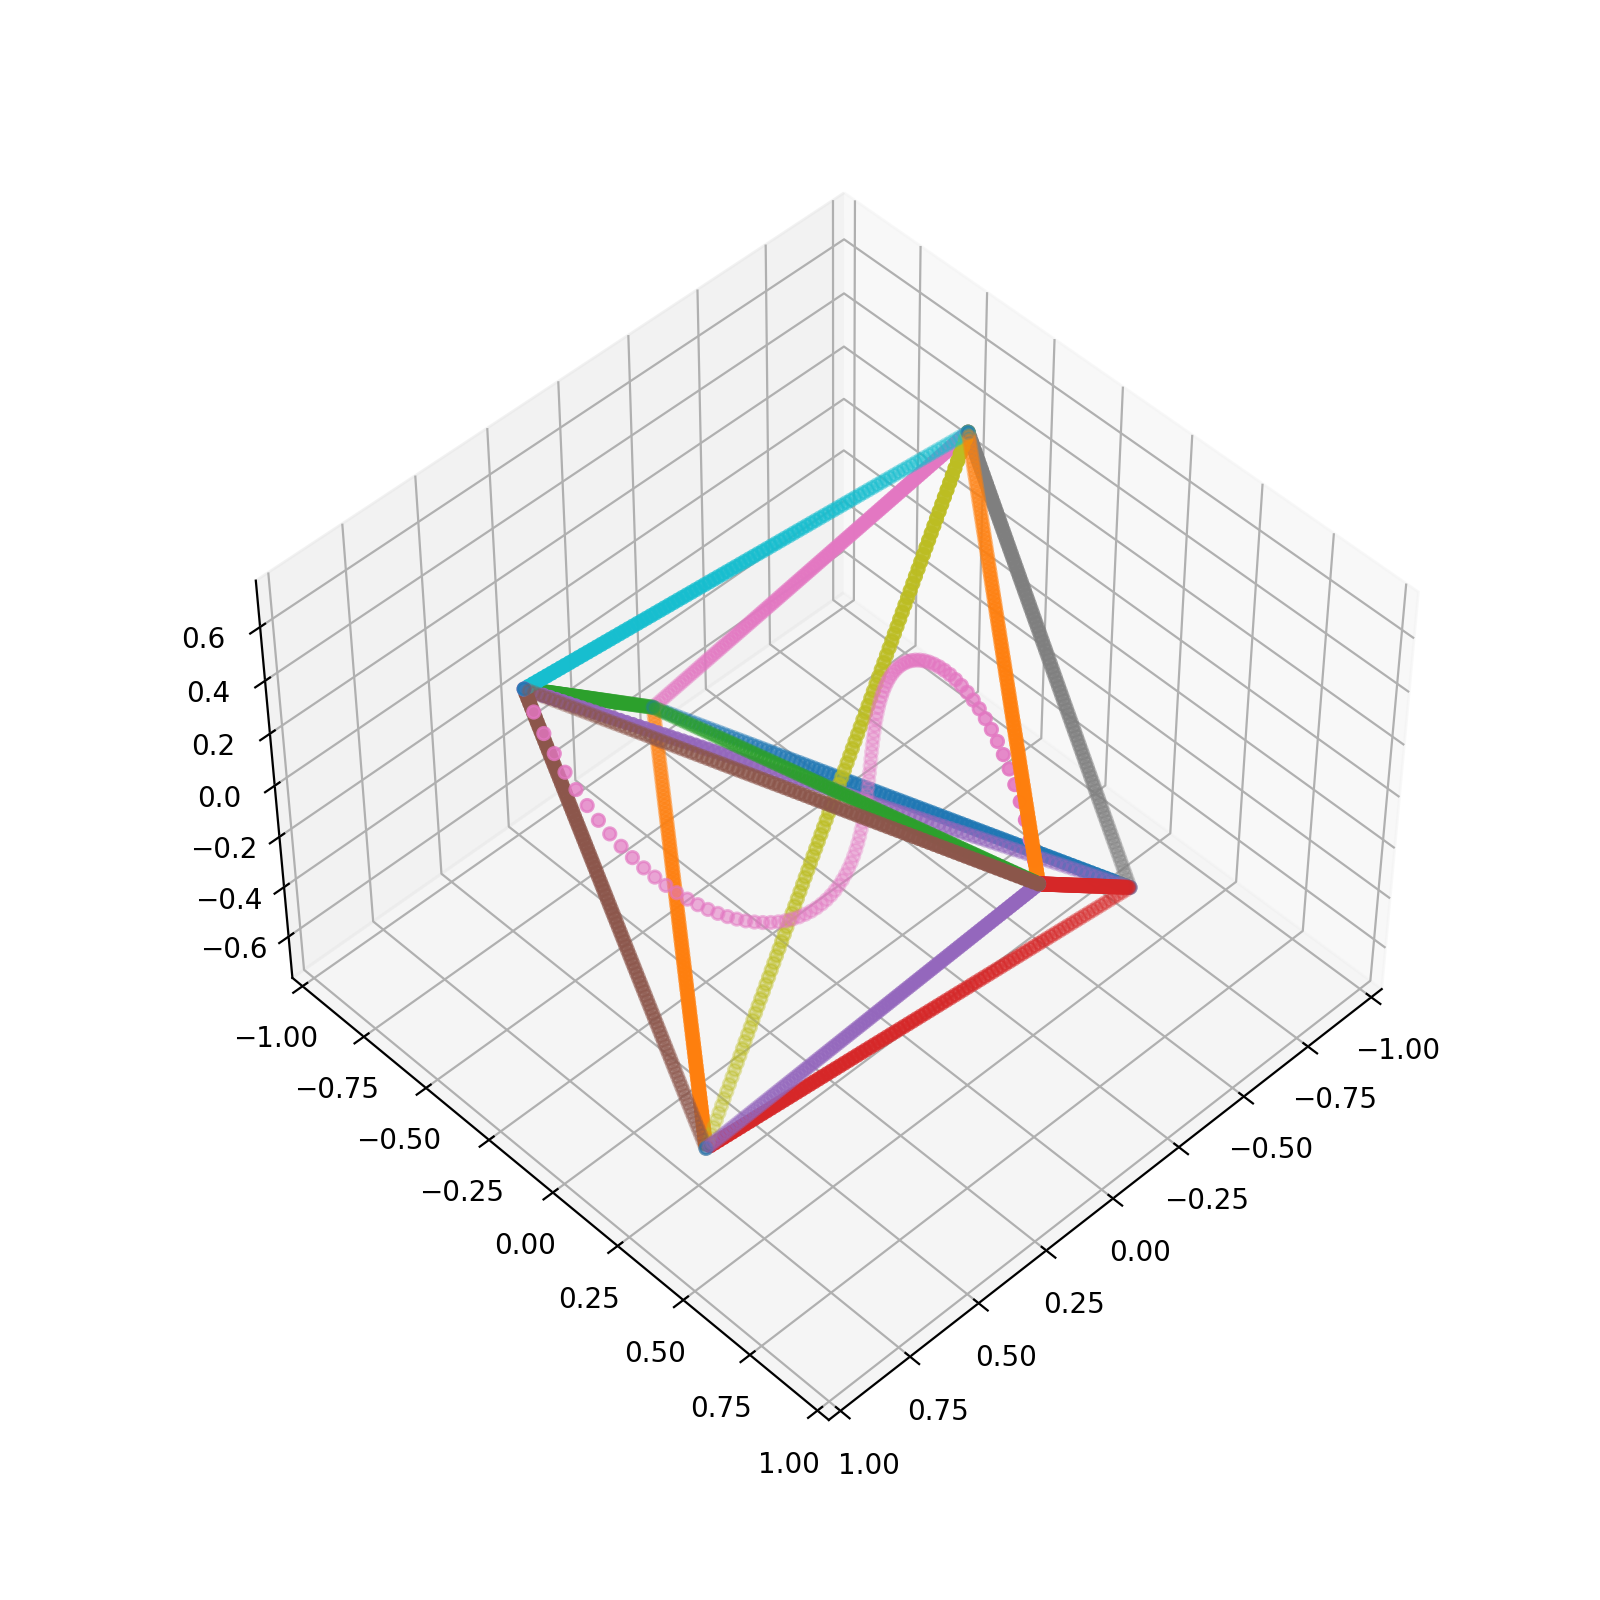

In [23]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(basis[:,0], basis[:,1], basis[:,2])
for i in range(len(bounds)):
    ax.scatter3D(bounds[i][:,0], bounds[i][:,1], bounds[i][:,2])
ax.scatter3D(transformed[:,0], transformed[:,1], transformed[:,2])
ax.axes.set_xlim3d(left=-1, right=1) 
ax.axes.set_ylim3d(bottom=-1, top=1)  
ax.axes.set_ylim3d(bottom=-1, top=1) 
ax.set_aspect('equal', adjustable='box')
plt.show()